In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.fftpack as fftpack
from scipy.fftpack import fft,fftshift
from scipy.fftpack import dct         
from scipy.signal import butter, sosfilt, sosfreqz
from numpy import median
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics 
from scipy.stats.mstats import gmean
from scipy.io import wavfile
from scipy import signal
import pywt

In [22]:
#   ICLISTENLF224_20150325T192217.907Zp.wav earthquake Earthquake South of Port Hardy, Vancouver Island
samplerate, data = wavfile.read('earthquake.wav')

In [23]:
fs = samplerate
signals = data
aux=np.linspace(0,len(signals)-1,len(signals))
times_1=aux/fs

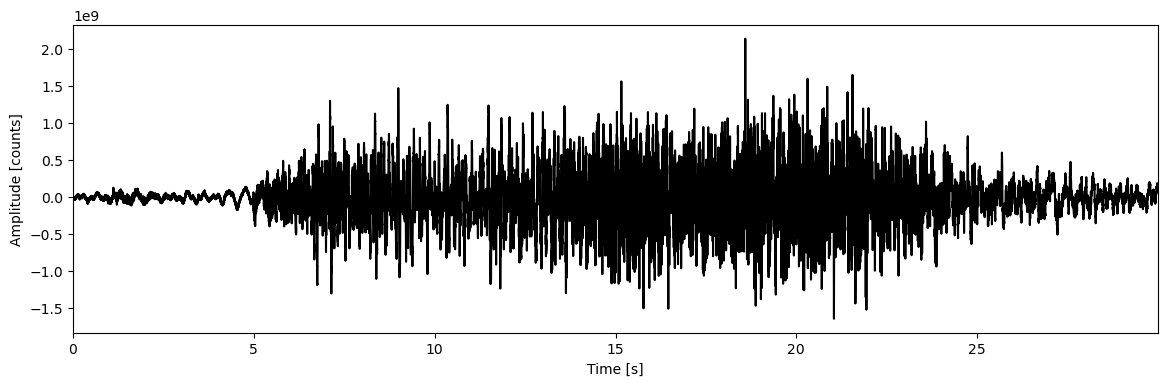

In [24]:
plt.figure(figsize=(14,4))        
plt.plot(times_1, signals, color='black')
plt.ylabel('Amplitude [counts]')
plt.xlabel('Time [s]')
plt.xlim(0, times_1[-1])
plt.savefig('signal_web.png')

In [25]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(data, lowcut, highcut, fs, order=9):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y
    
def banding(signl, fs, lowcut, highcut):
    x=signl-np.mean(signl)
    length1=len(x)
    time=np.linspace(0, round(length1), round(length1))/fs
    y1 = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    return(time,x, y1)

def pow_sig(x,S):
    frames = []
    nframes = int((len(x))/S)
    r=x-np.mean(x)
    for t in range(0,nframes):
        aux=r[(t*S):(t*S+S)]
        aux2=np.square(aux)
        frames.append(np.copy(sum(aux2)))
    return(frames)

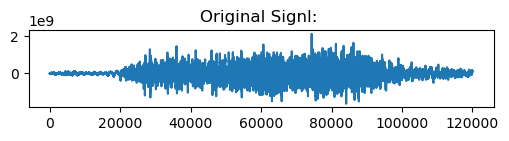

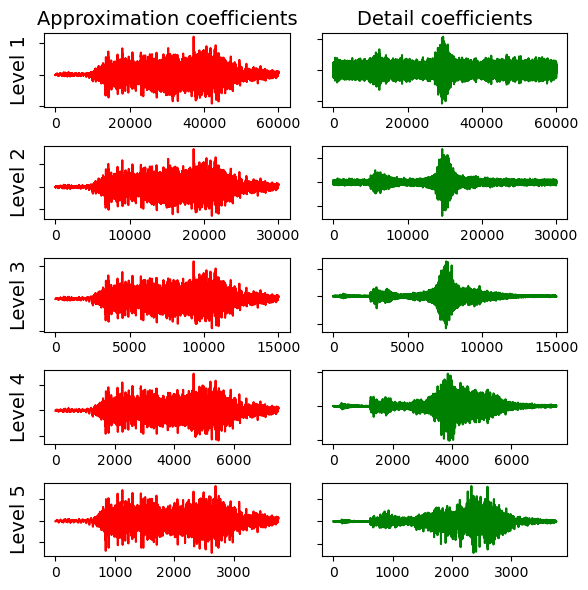

In [26]:
signl = signals
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Signl: ")
ax.plot(signl)
plt.show()
    
data = signl
waveletname = 'sym5'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
#plt.show()
plt.savefig('wavelet_coeffs_web.png')

In [27]:
times_1
signl = signals
fs = samplerate

In [28]:
scales = np.arange(1, 128)  # specify the range of scales (wavelet widths)
coefficients, frequencies = pywt.cwt(signl, scales, 'morl') 

In [29]:
sampling_frequency = samplerate  # Example sampling frequency (Hz)
num_scales = 128  # Number of scales used in the scalogram

# Approximate the frequencies corresponding to each scale
frequencies = sampling_frequency / np.arange(1, num_scales+1)

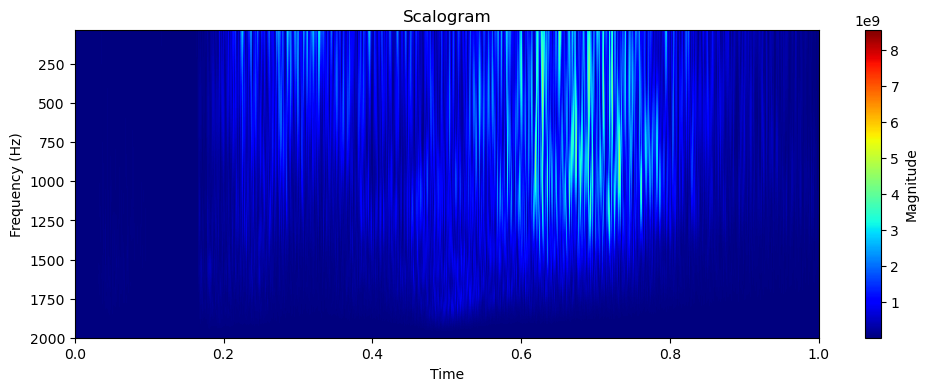

In [33]:
plt.figure(figsize=(12, 4))
plt.imshow(np.abs(coefficients), extent=[0, 1, frequencies[-1], frequencies[0]/2], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Scalogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.gca().invert_yaxis()  # invert y-axis for better visualization
plt.savefig('scalogram_web.png')

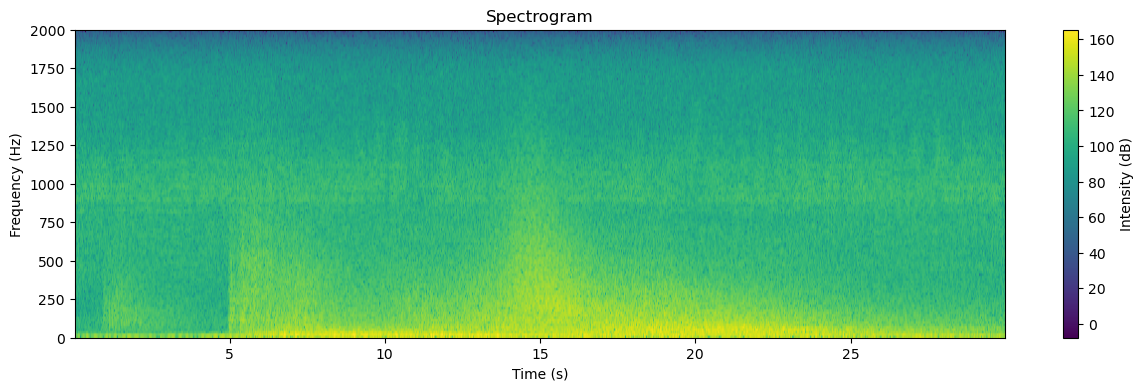

In [32]:
plt.figure(figsize=(15, 4))
plt.specgram(signl, Fs=samplerate)  # Fs is the sampling frequency (Hz)
plt.colorbar(label='Intensity (dB)')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.savefig('spectrogram_web.png')

C:\Users\berna\AppData\Local\Temp\ipykernel_12804\3930630401.py:17: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  axes.set_xlim([0,125])


(0.07514332096068697, 125)

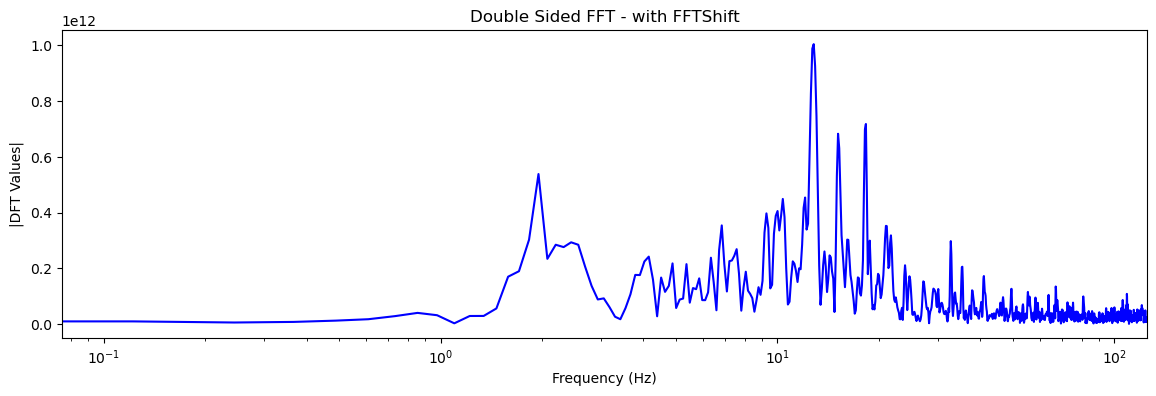

In [20]:
x = signals
x = signal.detrend(x)
fs = samplerate
NFFT=1024*32 #NFFT-point DFT
X=fftshift(fft(x,NFFT)) # X=fft(x,NFFT)  compute DFT using FFT

fVals=np.arange(start = -NFFT/2,stop = NFFT/2)*fs/NFFT  # index for FFT plot

plt.figure(figsize=(14,4))
plt.plot(fVals,np.abs(X), 'b')
plt.ylabel('|DFT Values|')
plt.title('Double Sided FFT - with FFTShift')
plt.xlabel('Frequency (Hz)')
plt.xscale('log')  # Set x-axis to logarithmic scale
axes = plt.gca()
axes.set_xlim([0,125])